#Credit Card Approval Determination
Credit card approval determination is a critical process for financial institutions, where they evaluate potential customers' creditworthiness to decide whether to approve or reject credit card applications. This process involves analyzing various attributes of applicants to assess their ability to repay the credit and manage their financial responsibilities. The goal is to minimize the risk of defaults while ensuring that deserving applicants have access to credit.

Key Attributes in Credit Card Approval
Here are the key attributes commonly used in the credit card approval process:

**ID**: Unique identifier for each individual (customer).

**Gender**: The applicant's gender. This demographic information can sometimes be used in statistical analyses to understand trends, although it should be handled carefully to avoid discrimination.(0 for male, 1 for female)

**Own_car**: Indicates whether the applicant owns a car. Car ownership can be a proxy for financial stability and asset ownership.(0 for no, 1 for yes)

**Own_property**: Indicates whether the applicant owns property. Property ownership is often associated with financial stability and creditworthiness.
(0 for no, 1 for yes)

**Work_phone**: Whether the applicant has a work phone. This can be an indicator of stable employment.(0 for no, 1 for yes)

**Phone**: Whether the applicant has a personal phone. Having a phone can be a basic requirement for communication and contactability.(0 for no, 1 for yes)

**Email**: Whether the applicant has an email address. This is important for communication.(0 for no, 1 for yes)

**Unemployed**: Indicates whether the applicant is currently unemployed. Employment status is a crucial factor in assessing income stability.(0 for no, 1 for yes)

**Num_children**: The number of children the applicant has. This can affect the applicant's financial responsibilities and disposable income.

**Num_family**: The total number of family members. Larger family size might indicate higher financial obligations.

**Account_length**: The length of time the applicant has had an account with the bank. Longer account history can be a sign of stability and reliability.

**Total_income**: The total income of the applicant. Higher income generally increases the likelihood of credit approval as it indicates the ability to repay.

**Age**: The age of the applicant. Age can correlate with financial experience and stability.

**Years_employed**: The number of years the applicant has been employed. Longer employment history usually suggests job stability and steady income.

**Income_type**: The type of income (e.g., salary, business income). Different income types can have varying levels of reliability and stability.

**Education_type**: The applicant's level of education. Higher education levels can correlate with better job prospects and financial literacy.

**Family_status**: The applicant's marital status (e.g., single, married). Family status can influence financial responsibilities and stability.

**Housing_type**: The type of housing (e.g., rented, owned). Owning a home can be a sign of financial stability.

**Occupation_type**: The applicant's occupation. Certain occupations might be seen as more stable or higher earning, influencing creditworthiness.

**Target**: The target variable indicating whether the credit card application was approved or not. This is the outcome we aim to predict based on the other attributes.(**0 for Not Eligible and 1 for eligible**)

These attributes collectively provide a comprehensive profile of the applicant, enabling financial institutions to make informed decisions about credit card approvals. By analyzing these factors, banks can assess the risk associated with each applicant and ensure that credit is extended to individuals who are likely to manage their credit responsibly.

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings

In [3]:
warnings.filterwarnings('ignore')

### Loading Data

In [4]:
df=pd.read_csv('/content/drive/MyDrive/PROJECTS DS/Project data sets/credit_card.csv')

In [5]:
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


##Initial Analysis

In [6]:
df['Target'].value_counts()

Target
0    8426
1    1283
Name: count, dtype: int64

As seen above, this dataset is an imbalanced dataset. Oversampling can be tried to see if any improvements in metrics after initial predictions on the actual dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

There are 9709 rows and 20 columns

In [8]:
df.duplicated().sum()

0

There are no duplicates in the dataset.

In [9]:
df.isna().sum()

ID                 0
Gender             0
Own_car            0
Own_property       0
Work_phone         0
Phone              0
Email              0
Unemployed         0
Num_children       0
Num_family         0
Account_length     0
Total_income       0
Age                0
Years_employed     0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Occupation_type    0
Target             0
dtype: int64

There are no null values in the dataset.

In [10]:
df.describe()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


### Preprocessing

Formatting Age and Years employed to remove the decimals so that it can be represented as intergers for better understanding.

In [11]:
df['Age']=df['Age'].apply(lambda x:math.floor(x))
df['Years_employed']=df['Years_employed'].apply(lambda x:math.floor(x))

Dropping the ID as it is not important for classification

In [12]:
df.drop('ID',axis=1,inplace=True)

In [13]:
df.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,1,1,1,1,0,0,0,0,2,15,427500.0,32,12,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,1,1,1,0,0,0,0,0,2,29,112500.0,58,3,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,0,0,1,0,1,1,0,0,1,4,270000.0,52,8,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,0,0,1,0,0,0,1,0,1,20,283500.0,61,0,Pensioner,Higher education,Separated,House / apartment,Other,0
4,1,1,1,1,1,1,0,0,2,5,270000.0,46,2,Working,Higher education,Married,House / apartment,Accountants,0


### Label Encoding

Labelling the features having text based categories with numerical Values.

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [15]:
col_convert=['Income_type','Education_type', 'Family_status', 'Housing_type', 'Occupation_type']
dict={}
for i in col_convert:
  df[i]=encoder.fit_transform(df[i])
  dict[i]=encoder.classes_

In [16]:
#creating a look up function to see the encoded values

Creating a look up function to see the encoded values to later use it as a reference to streamlit based hosting of the project.

In [17]:
def lookup(input):
  return pd.DataFrame(dict[input])


In [18]:
lookup('Income_type')

,0
0,Commercial associate
1,Pensioner
2,State servant
3,Student
4,Working


In [19]:
df.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,1,1,1,1,0,0,0,0,2,15,427500.0,32,12,4,1,0,4,12,1
1,1,1,1,0,0,0,0,0,2,29,112500.0,58,3,4,4,1,1,17,0
2,0,0,1,0,1,1,0,0,1,4,270000.0,52,8,0,4,3,1,15,0
3,0,0,1,0,0,0,1,0,1,20,283500.0,61,0,1,1,2,1,12,0
4,1,1,1,1,1,1,0,0,2,5,270000.0,46,2,4,1,1,1,0,0


### Plotting Graphs

Correlation of each Feature with the Target

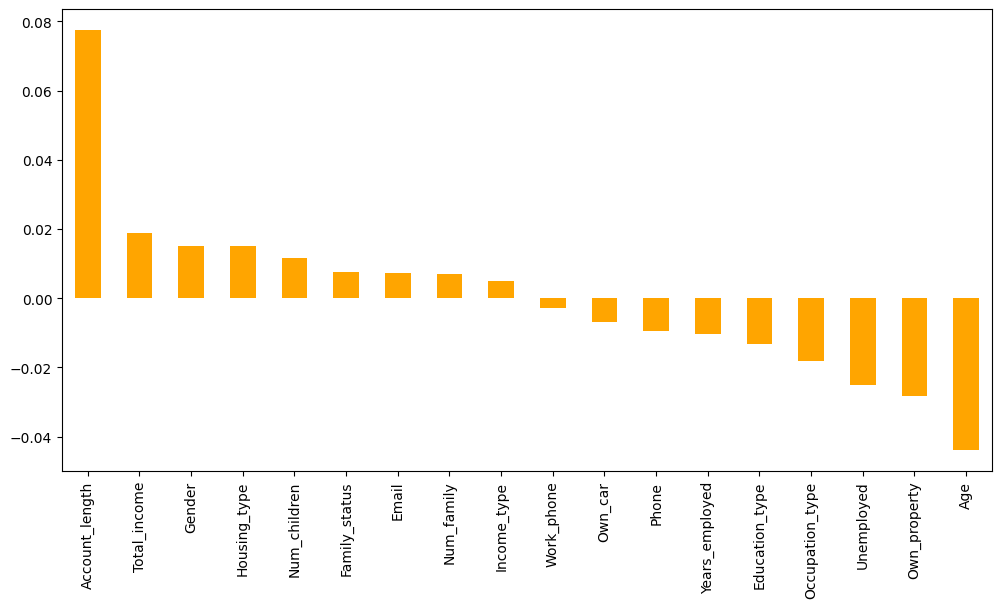

In [20]:
plt.figure(figsize=(12,6))
df.corr()['Target'][:-1].sort_values(ascending=False).plot(kind='bar',color='orange')
plt.show()

From the above graph Account length and age seems to have the highest correlation with the target

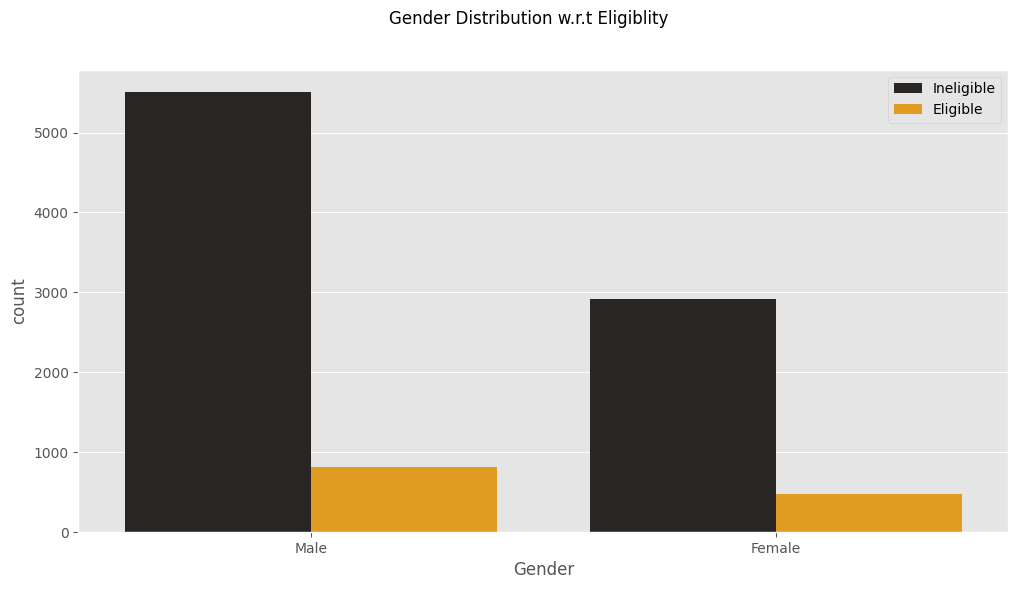

In [21]:
plt.style.use("ggplot")
plt.figure(figsize=(12, 6))
sns.countplot(data=df,x='Gender',color='orange',hue='Target')
plt.suptitle('Gender Distribution w.r.t Eligiblity')
plt.xticks(ticks=[0,1],labels=['Male','Female'])
plt.legend(['Ineligible', 'Eligible'])
plt.show()

Only a few portion of the total male and female population are eligible for the credit card

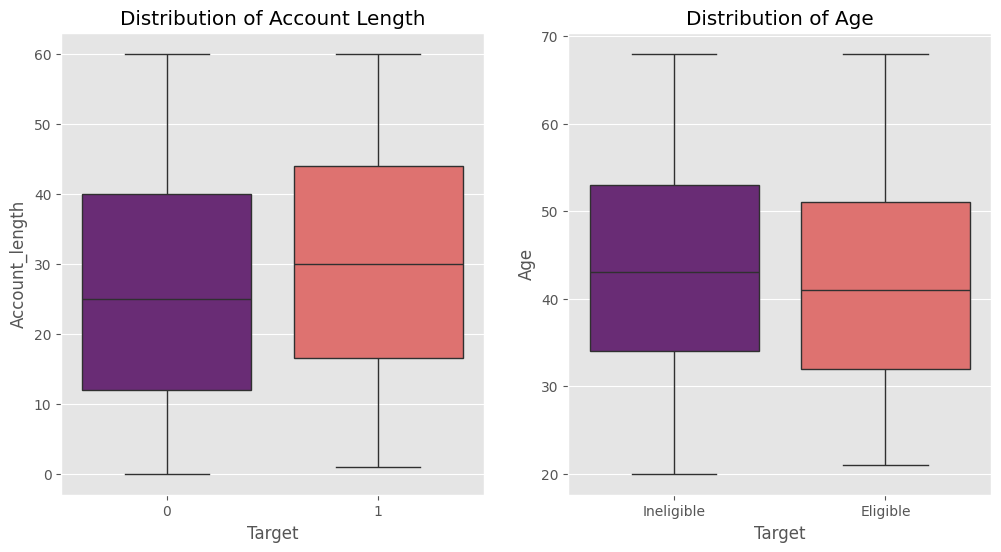

In [22]:

plt.style.use("ggplot")
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df,x='Target',y='Account_length', palette='magma')
plt.title('Distribution of Account Length')


plt.subplot(1, 2, 2)
sns.boxplot(data=df,x='Target',y='Age',palette='magma')
plt.title('Distribution of Age')
plt.xticks(ticks=['0','1'],labels=['Ineligible','Eligible'])

plt.show()




*   The 50 th percentile of account length appears to be arround 30 for eligible customers whereas for ineligible customers it is around 25.
*   The 50 th percentile for age are not that different among the eligible and ineligible having values between 40 and 45.



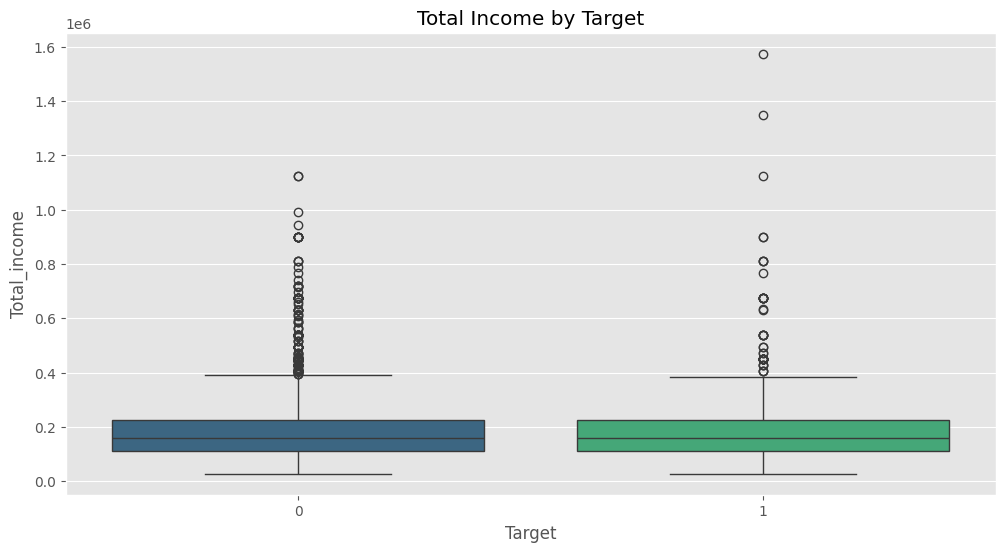

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Target', y='Total_income', data=df, palette='viridis')
plt.title('Total Income by Target')
plt.show()

The eligible customers seems to have a much higher valued income outliers than the non eligible ones.Apart from that the income between 2 groups doesn't vary much between Q1 to Q3.

### Splitting the Data

In [24]:
X=df.drop('Target',axis=1)
y=df['Target']

### Scaling the Data

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=18)

### Initial Classification without any Oversampling or Feature Selection

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2529
           1       0.13      0.02      0.03       384

    accuracy                           0.85      2913
   macro avg       0.50      0.50      0.48      2913
weighted avg       0.77      0.85      0.80      2913



Here with the imbalanced dataset the prediction performance metrics of eligible class (1) is very low. Hence trying out feature selection and oversampling to check improvement in performance.

### Feature Selection

Performing Feature Selection to find the top 10 features that have high correlation with the target to improve performance.

In [29]:
from sklearn.feature_selection import SelectKBest, chi2

chi2_selector = SelectKBest(chi2, k=10)
X_kbest = chi2_selector.fit_transform(X, y)

In [30]:
features=list(chi2_selector.get_feature_names_out())
print(features)

['Gender', 'Own_property', 'Unemployed', 'Num_children', 'Account_length', 'Total_income', 'Age', 'Years_employed', 'Housing_type', 'Occupation_type']


In [31]:
X_filtered=scaler.fit_transform(X_kbest)

### OverSampling

In [32]:
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=42)

In [33]:
X_res, y_res =os.fit_resample(X_filtered,y)

In [34]:
y_res.value_counts()

Target
1    8426
0    8426
Name: count, dtype: int64

Now we have a balanced dataset

### Classification using KNeighborsClassifier after Feature Selection and OverSampling.

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.3,random_state=42)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.59      0.72      2526
           1       0.70      0.94      0.80      2530

    accuracy                           0.77      5056
   macro avg       0.81      0.77      0.76      5056
weighted avg       0.81      0.77      0.76      5056



Eventhough the accuracy decreased we were able to get improved precision,recall and f1-score.We can further try to improve performance using hyperparameter Tuning.

### Hyper Parameter Tuning

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
param = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2]
}

In [40]:
grid_search = GridSearchCV(estimator=knn, param_grid=param, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and estimator
print("Best parameters found by Grid Search:", grid_search.best_params_)
best_grid = grid_search.best_estimator_

Fitting 3 folds for each of 560 candidates, totalling 1680 fits
Best parameters found by Grid Search: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [41]:
best_grid

KNeighborsClassifier(leaf_size=10, n_neighbors=3, p=1, weights='distance')

In [42]:
knn=KNeighborsClassifier(algorithm= 'auto', leaf_size=10,n_neighbors=3,p= 1, weights= 'distance')

In [43]:
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.67      0.78      2526
           1       0.75      0.96      0.84      2530

    accuracy                           0.82      5056
   macro avg       0.84      0.81      0.81      5056
weighted avg       0.84      0.82      0.81      5056



After Hyper Parameter Tuning the accuracy increased from 76 to 82 percent.

### Multiple Model Classification

Now trying the dataset with different Classification Models and comparing it with KNN to determine the best model for prediction.

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier

In [46]:

svc=SVC()
etc=ExtraTreesClassifier(random_state=42)
dtc=DecisionTreeClassifier(random_state=42)
rfc=RandomForestClassifier(random_state=42)
abc=AdaBoostClassifier(random_state=42)
gbc=GradientBoostingClassifier(random_state=42)
xbc=XGBClassifier()


In [47]:
classifiers={
    'ExtraTreesClassifier':etc,
    'KNeighborsClassifier':knn,
    'SVC':svc,
    'DecisionTreeClassifier' :dtc,
    'RandomForestClassifier':rfc,
    'GradientBoostingClassifier':gbc,
    'AdaBoostClassifier':abc,
    'XGBClassifier':xbc
}

In [48]:
from sklearn.metrics import accuracy_score,precision_score
from sklearn.model_selection import cross_val_score


In [49]:
def train_model(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    p_score = precision_score(y_test, y_pred, average='weighted')
    kf_score = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)
    return round(score*100,2) ,round(p_score*100,2), round(kf_score.mean()*100,2)

In [50]:
precision = []
accuracy = []
k_fold = []
start_time = time.time()

for model,classifier in classifiers.items():
    acc,prec,kf = train_model(classifier)
    accuracy.append(acc)
    precision.append(prec)
    k_fold.append(kf)
    finish_time = time.time()
    print(f"{model} has been successfully evaluated. Total time taken is: {(finish_time-start_time)} seconds")
    start_time = finish_time

ExtraTreesClassifier has been successfully evaluated. Total time taken is: 6.633571624755859 seconds
KNeighborsClassifier has been successfully evaluated. Total time taken is: 1.8470818996429443 seconds
SVC has been successfully evaluated. Total time taken is: 48.16726112365723 seconds
DecisionTreeClassifier has been successfully evaluated. Total time taken is: 0.4532151222229004 seconds
RandomForestClassifier has been successfully evaluated. Total time taken is: 10.71608281135559 seconds
GradientBoostingClassifier has been successfully evaluated. Total time taken is: 10.707987308502197 seconds
AdaBoostClassifier has been successfully evaluated. Total time taken is: 2.773866653442383 seconds
XGBClassifier has been successfully evaluated. Total time taken is: 1.130225658416748 seconds


In [51]:
score_comparison = pd.DataFrame({'Model': classifiers.keys(), 'Accuracy': accuracy, 'Precision': precision, 'K-Fold': k_fold})
score_comparison

,Model,Accuracy,Precision,K-Fold
0,ExtraTreesClassifier,91.93,91.93,91.01
1,KNeighborsClassifier,81.51,84.23,80.84
2,SVC,58.01,58.53,58.00
3,DecisionTreeClassifier,82.65,82.66,82.49
4,RandomForestClassifier,89.93,90.36,90.34
5,GradientBoostingClassifier,85.66,86.65,85.59
6,AdaBoostClassifier,75.93,76.82,74.24
7,XGBClassifier,89.08,89.80,89.54


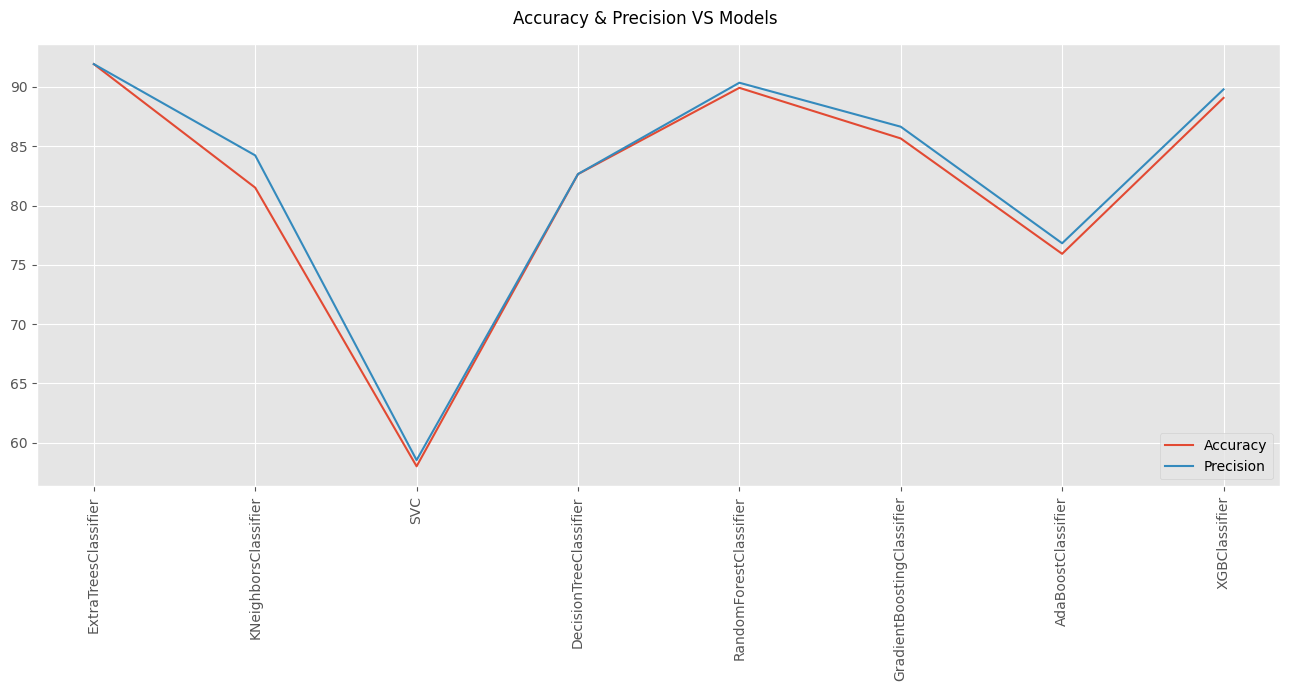

In [52]:
plt.figure(figsize=(13,7))
score_comparison['Accuracy'].plot(kind='line')
score_comparison['Precision'].plot(kind='line')
plt.suptitle('Accuracy & Precision VS Models')
plt.xticks(ticks=range(0,8),labels=classifiers.keys(),rotation=90)
plt.legend(['Accuracy','Precision'],loc='lower right')
plt.tight_layout()
plt.show()

Extra Trees Classifier is the best Performing Model.Hence choosing this model to predict.

### Pipeline

Creating a Pipeline to predict the input data

In [53]:
from sklearn.pipeline import Pipeline

In [54]:
pipeline=Pipeline([
    ('scaling',MinMaxScaler()),
    ('classification',ExtraTreesClassifier(random_state=42))
])

In [55]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaling', MinMaxScaler()),
                ('classification', ExtraTreesClassifier())])

### Custom Function to Predict the Eligiblity

In [56]:
def eligibility(input):
  result = pipeline.predict([input])
  if result==0:
    return 'Sorry, You are not eligible for a credit card'
  else:
    return 'Congrats! You are eligible for a credit card.'

### Sample Prediction

In [57]:
y[0]

1

In [58]:
#Target Class
# 0 - Not Eligible
# 1 - Eligible

In [59]:
eligibility(X_filtered[0])

'Congrats! You are eligible for a credit card.'

Got the Correct Prediction when tried with a sample

Saving the model using Pickle

In [60]:
import pickle
pickle.dump(etc,open('creditcard_eligiblity.sav','wb'))
pickle.dump(scaler,open('MinMaxscaler.sav','wb'))